In [1]:
import pandas as pd
import numpy as np
import socket

time, acc1, acc2, acc3 =[],[],[],[]
time_taken=False
time0=0
path = './data/'
target = 'target.csv'
nuevo_nombre = 'dataset_gabriel_50.csv'
caida = False

In [2]:
def get_ip():
    s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    try:
        # doesn't even have to be reachable
        s.connect(('10.255.255.255', 1))
        IP = s.getsockname()[0]
    except:
        IP = '127.0.0.1'
    finally:
        s.close()
    return IP
print(get_ip())

192.168.0.7


In [3]:
import socket
s=socket.socket(socket.AF_INET,socket.SOCK_DGRAM)
s.bind(('',5555))

while True:
    data,addr=s.recvfrom(5555)
    procesado = str(data).split('\'')[1].split(',')
    if not time_taken:
        time0 = procesado[0] 
        time_taken= True
    time.append( - float(time0)+float(procesado[0]))
    acc1.append(procesado[2])
    acc2.append(procesado[3])
    acc3.append(procesado[4])
    print ("tiempo Transcurrido = "+str(-float(time0)+float(procesado[0])))
    if (-float(time0)+float(procesado[0]))>5:
        break

tiempo Transcurrido = 0.0
tiempo Transcurrido = 0.0601198673248291
tiempo Transcurrido = 0.11994004249572754
tiempo Transcurrido = 0.1799299716949463
tiempo Transcurrido = 0.24180984497070312
tiempo Transcurrido = 0.2999298572540283
tiempo Transcurrido = 0.35994982719421387
tiempo Transcurrido = 0.4199998378753662
tiempo Transcurrido = 0.47993993759155273
tiempo Transcurrido = 0.5399999618530273
tiempo Transcurrido = 0.5999300479888916
tiempo Transcurrido = 0.6599500179290771
tiempo Transcurrido = 0.7199399471282959
tiempo Transcurrido = 0.7799298763275146
tiempo Transcurrido = 0.8399498462677002
tiempo Transcurrido = 0.8999300003051758
tiempo Transcurrido = 0.9599699974060059
tiempo Transcurrido = 1.0199899673461914
tiempo Transcurrido = 1.0799498558044434
tiempo Transcurrido = 1.1399600505828857
tiempo Transcurrido = 1.19992995262146
tiempo Transcurrido = 1.2599499225616455
tiempo Transcurrido = 1.319969892501831
tiempo Transcurrido = 1.379960060119629
tiempo Transcurrido = 1.4399600

In [4]:
df = pd.DataFrame({'time': time, 'acc1': acc1,'acc2':acc2,'acc3':acc3})

In [5]:
df.head()

,time,acc1,acc2,acc3
0,0.00000,-0.498,4.798,8.370
1,0.06012,1.580,5.909,7.834
2,0.11994,0.833,3.744,6.857
3,0.17993,2.767,3.581,10.008
4,0.24181,-2.643,2.566,9.644


In [6]:
df.to_csv(path+nuevo_nombre)

In [7]:
tar =  pd.DataFrame ({'ID':[nuevo_nombre], 'class_label': [1 if caida else -1]})
t = pd.read_csv(path+target)


In [8]:
t = t.append(tar,ignore_index = True)
t.to_csv(path+target, index = False)

In [9]:
t.tail()

,ID,class_label
200,dataset_gabriel_50.csv,-1
201,dataset_gabriel_50.csv,-1
202,dataset_gabriel_50.csv,-1
203,dataset_gabriel_50.csv,-1
204,dataset_gabriel_50.csv,-1


Requirement already up-to-date: pip in c:\programdata\anaconda3\lib\site-packages (19.2.3)
Note: you may need to restart the kernel to use updated packages.


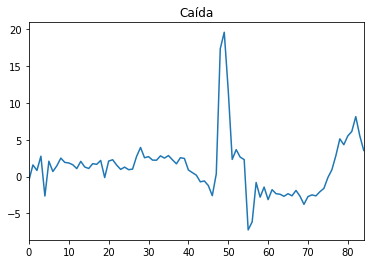

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.title("Caída")
graf=df['acc1'].astype('float').plot()
#plt.savefig("Caida.png")

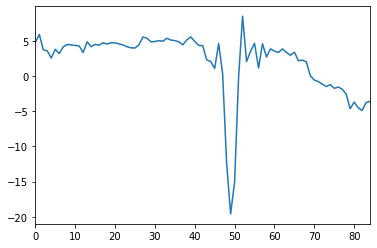

In [12]:
df['acc2'].astype('float').plot()

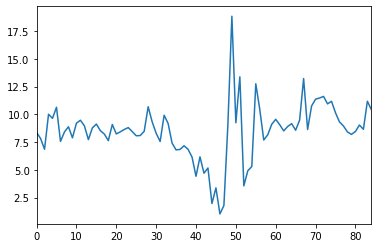

In [13]:
df['acc3'].astype('float').plot()

In [14]:
#tar = pd.DataFrame ({'ID':[], 'class_label': []})
#tar.to_csv(path+target, index = False)